<a href="https://colab.research.google.com/github/PaoPla/Regresion-lineal/blob/main/Actividad_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [275]:
#files.upload()

{}

In [276]:
#Carga desde un archivo .csv sin indice
california = pd.read_csv("California_EUA.csv", index_col=0)
mexico = pd.read_csv("DF_Mexico.csv",index_col=0)
espana = pd.read_csv("Girona_España.csv",encoding= 'unicode_escape',index_col=0)

# **MEXICO**

In [277]:
#Verificamos información del DataFrame
mexico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24224 entries, 2056638 to 854260329845513725
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   24224 non-null  object 
 1   scrape_id                                     24224 non-null  int64  
 2   last_scraped                                  24224 non-null  object 
 3   source                                        24224 non-null  object 
 4   name                                          24223 non-null  object 
 5   description                                   23296 non-null  object 
 6   neighborhood_overview                         15145 non-null  object 
 7   picture_url                                   24224 non-null  object 
 8   host_id                                       24224 non-null  int64  
 9   host_url                                  

##**VALORES NULOS**

In [278]:
#Corroboramos valores nulos
mexico.isnull().sum().sum()

189609

In [279]:
#Debido a que la variable de price esta como string, esta se cambia a float y se eliminan los signos de pesos y comas.
mexico.price= mexico.price.replace({'\$':''}, regex = True)
mexico.price= mexico.price.replace({'\,':''}, regex = True)
mexico.host_response_rate= mexico.host_response_rate.replace({'\%':''}, regex = True)
mexico.host_acceptance_rate= mexico.host_acceptance_rate.replace({'\%':''}, regex = True)
mexico['host_response_rate'] = mexico['host_response_rate'].astype(float)
mexico['host_acceptance_rate'] = mexico['host_acceptance_rate'].astype(float)
mexico['price'] = mexico['price'].astype(float)

In [280]:
#Separamos la data frame en cualitativas y cunatitativas
cuanM = mexico.select_dtypes(include=[np.float, np.int])
cualiM = mexico.select_dtypes(include=[np.object])

<ipython-input-280-43b6879ca6e1>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cuanM = mexico.select_dtypes(include=[np.float, np.int])
<ipython-input-280-43b6879ca6e1>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c

In [281]:
#Vemos los valores nulos por columna
cualiM.isnull().sum()

listing_url                   0
last_scraped                  0
source                        0
name                          1
description                 928
neighborhood_overview      9079
picture_url                   0
host_url                      0
host_name                     0
host_since                    0
host_location              5172
host_about                10664
host_response_time         3091
host_is_superhost             5
host_thumbnail_url            0
host_picture_url              0
host_neighbourhood        12401
host_verifications            0
host_has_profile_pic          0
host_identity_verified        0
neighbourhood              9079
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               30
amenities                     0
has_availability              0
calendar_last_scraped         0
first_review               3596
last_review                3596
instant_bookable              0
dtype: i

In [282]:
#Remplazamos valores nulos por "--", para que no haya confusion posteriormente con cuales datos no han sido rellenados
cualiM= cualiM.fillna("--")

In [283]:
#corroboramos que no hay valores nulos
cualiM.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
instant_bookable          0
dtype: int64

In [284]:
#Checamos que columnas tienen valores nulos
cuanM.isnull().sum()

scrape_id                                           0
host_id                                             0
host_response_rate                               3091
host_acceptance_rate                             2043
host_listings_count                                 0
host_total_listings_count                           0
neighbourhood_group_cleansed                    24224
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                       24224
bedrooms                                          555
beds                                              271
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              1
maximum_minimum_nights                              1
minimum_maximum_nights      

In [285]:
#Rellenamos con 0 los valores nulos de las columnas que tiene mas de 4000 valores nulos, siendo que el usar otro metodo afectaria demasiado los resultados
cuanM[['neighbourhood_group_cleansed','bathrooms','calendar_updated','license']]=cuanM[['neighbourhood_group_cleansed','bathrooms','calendar_updated','license']].fillna(0)

In [286]:
#Verificamos valores nulos
cuanM.isnull().sum()

scrape_id                                          0
host_id                                            0
host_response_rate                              3091
host_acceptance_rate                            2043
host_listings_count                                0
host_total_listings_count                          0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                         555
beds                                             271
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             1
maximum_minimum_nights                             1
minimum_maximum_nights                        

In [287]:
#Debido a que estas dos variables tienen pocos valores nulos los rellenamos con el promedio
#Siendo que son variables que nos hablan de cantidad de cuartos y camas entonces no afecta el poner el promedio
cuanM[["bedrooms", "beds"]]=cuanM[["bedrooms", "beds"]].fillna(round(cuanM[["bedrooms", "beds"]].mean(),1))

In [288]:
#Se utilizo en metodo de fillna para rellenar estas columnas con 0, ya que nos hablan de los scores entonces no seria correcto el afectarlos y darles un score que no obtuvieron
cuanM[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]]=cuanM[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]].fillna(0)

In [289]:
#La columnas que encontramos con solo un valor nulo se relleno con el promedio, siendo que solo es un valor
cuanM[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "minimum_nights", "maximum_nights"]]=cuanM[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "minimum_nights", "maximum_nights"]].fillna(round(cuanM[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "minimum_nights", "maximum_nights"]].mean(),1))

In [290]:
#Verificamos que columnas aun tienen valores nulos
cuanM.isnull().sum()

scrape_id                                          0
host_id                                            0
host_response_rate                              3091
host_acceptance_rate                            2043
host_listings_count                                0
host_total_listings_count                          0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                             0
minimum_maximum_nights                        

In [291]:
#Como son columnas con solo 1 valor nulo las rellenamos con 0, con la funcion fillna(0)
cuanM= cuanM.fillna(0)

In [292]:
#Corroboramos que no hay valores nulos
cuanM.isnull().sum().sum()

0

##**OUTLIERS**

<Figure size 1500x800 with 0 Axes>

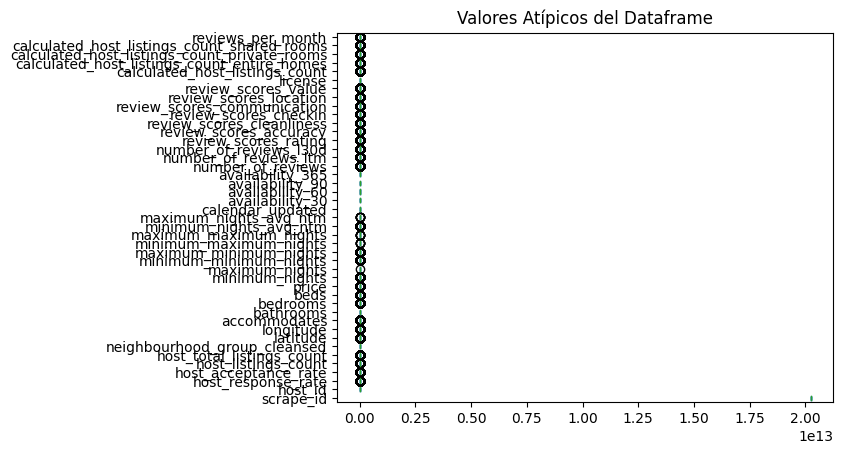

In [293]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuanM.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [294]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
#Este metodo se utiliza ya que lo he encontrado mas efectivo que el metodo de desviacion estandar, siendo que este metodo si elimina todos los outliers
#Por otro lado me parece adecuado ya que al utilizar cuartiles en un dataframe tan grande y simetrico ayuda a que exista un mejor resultado de este metodo
y=cuanM

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023033e+13
host_id                                         6.839189e+08
host_response_rate                              1.090000e+02
host_acceptance_rate                            1.150000e+02
host_listings_count                             2.850000e+01
host_total_listings_count                       3.200000e+01
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        1.949915e+01
longitude                                      -9.911735e+01
accommodates                                    7.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.161500e+03
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+0

In [295]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuanM[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072354,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35797,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,-99.27178,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
44616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853923589855678923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
853966732274073000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
854225071295768399,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
#Obtenemos datos limpios del Dataframe
cuanM= cuanM[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
cuanM

,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,20230329041210,10531228,100.0,NaN,3.0,7.0,0.0,19.353530,-99.162990,3.0,...,5.00,4.95,5.00,4.86,0.0,3.0,3.0,0.0,0.0,0.19
2072354,20230329041210,16840050,NaN,NaN,3.0,3.0,0.0,19.353580,-99.169480,2.0,...,4.93,5.00,4.95,4.84,0.0,2.0,2.0,0.0,0.0,0.54
696037,20230329041210,3531879,100.0,90.0,4.0,4.0,0.0,19.441800,-99.184020,6.0,...,4.92,4.92,4.58,4.71,0.0,3.0,3.0,0.0,0.0,0.31
35797,20230329041210,153786,NaN,NaN,1.0,1.0,0.0,19.382830,NaN,2.0,...,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.00
44616,20230329041210,196253,100.0,86.0,16.0,16.0,0.0,19.411620,-99.177940,NaN,...,4.87,4.78,4.98,4.48,0.0,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853923589855678923,20230329041210,488030249,100.0,100.0,3.0,4.0,0.0,19.396663,-99.148145,2.0,...,NaN,NaN,NaN,NaN,0.0,2.0,2.0,0.0,0.0,0.00
853966732274073000,20230329041210,506816029,NaN,NaN,1.0,1.0,0.0,19.392023,-99.118722,7.0,...,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.00
854225071295768399,20230329041210,154670560,NaN,96.0,1.0,6.0,0.0,19.371088,-99.190186,2.0,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.00


In [297]:
#Corroboramos valores nulos del dataframe LIMPIO
cuanM.isnull().sum()

scrape_id                                          0
host_id                                            0
host_response_rate                              4849
host_acceptance_rate                            4267
host_listings_count                             3324
host_total_listings_count                       3453
neighbourhood_group_cleansed                       0
latitude                                        1490
longitude                                       2594
accommodates                                    1090
bathrooms                                          0
bedrooms                                         640
beds                                            2347
price                                           1707
minimum_nights                                  3195
maximum_nights                                     1
minimum_minimum_nights                          3082
maximum_minimum_nights                          1895
minimum_maximum_nights                        

In [298]:
#Reemplazamos valores atípicos (nulos) del dataframe con "0"
cuanM=cuanM.fillna(round(cuanM.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuanM.isnull().sum()
valores_nulos

scrape_id                                       0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0


In [299]:
#Posteriormente al tener las 2 dataframes limpias, realizamos un merge, utilizando el indice como referecnia
mexico2=pd.merge(cualiM,cuanM , left_index=True, right_index=True, how='outer')
mexico2.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,--,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,...,5.00,4.95,5.00,4.86,0.0,3.0,3.0,0.0,0.0,0.19
2072354,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,...,4.93,5.00,4.95,4.84,0.0,2.0,2.0,0.0,0.0,0.54
696037,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,...,4.92,4.92,4.58,4.71,0.0,3.0,3.0,0.0,0.0,0.31
35797,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,4.90,4.90,4.90,4.80,0.0,1.0,1.0,0.0,0.0,0.00
44616,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,--,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,...,4.87,4.78,4.98,4.48,0.0,12.0,3.0,2.0,0.0,0.46


In [300]:
#Verificamos valores nulos
mexico2.isnull().sum().sum()

0

In [301]:
valorx = []
valory=[]
correlacion =[]
determinacion=[]

In [302]:
valorx=['host_response_rate', 'price', 'number_of_reviews', 'review_scores_cleanliness', 'numbres_of_reviews', 'review_scores_communication']
valory=['host_acceptance_rate', 'host_acceptance_rate', 'host_acceptance_rate', 'review_scores_location', 'availability_365', 'reviews_per_month']

##**Entire home/apt**

In [303]:
entire = mexico2[mexico2['room_type']=='Entire home/apt']

###**host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

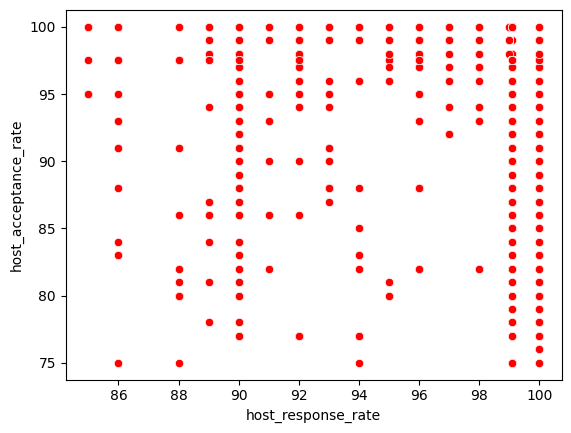

In [304]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="red", data=entire)

In [305]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['host_response_rate']]
Var_Dep= entire['host_acceptance_rate']

In [306]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [307]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [308]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [309]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.23988337]),
 'rank_': 1,
 'singular_': array([246.79262577]),
 'intercept_': 73.94160434967044}

**Modelo matemático: y= 0.23988337x + 73.94160434967044**

In [310]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.011756637684419147

In [311]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.1084280299757362

###**host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

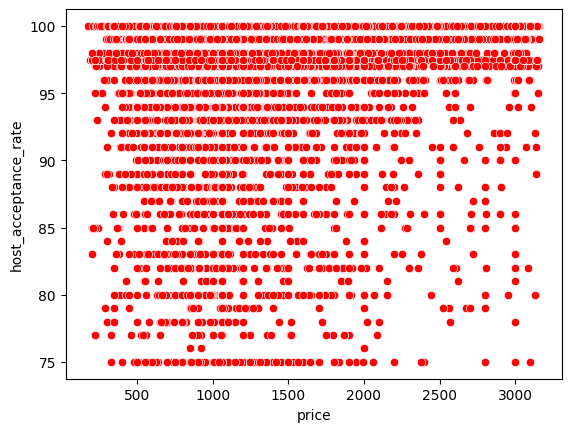

In [312]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=entire)

In [313]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['price']]
Var_Dep= entire['host_acceptance_rate']

In [314]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [315]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [316]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [317]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00024432]),
 'rank_': 1,
 'singular_': array([76929.08438989]),
 'intercept_': 97.4559554998328}

**Modelo matemático: y= 0.00024432x + 97.4559554998328**






In [318]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.0011849825975615014

In [319]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.034423576187861446

###**host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

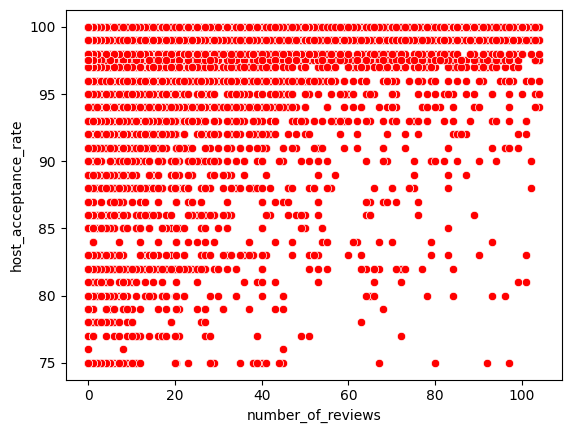

In [320]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=entire)

In [321]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['number_of_reviews']]
Var_Dep= entire['host_acceptance_rate']

In [322]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [323]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [324]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [325]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01565095]),
 'rank_': 1,
 'singular_': array([3043.40407768]),
 'intercept_': 97.40605726707881}

**Modelo matemático: y= 0.01565095x + 97.40605726707881**






In [326]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.007610600983578908

In [327]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.08723875849402551

###**review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

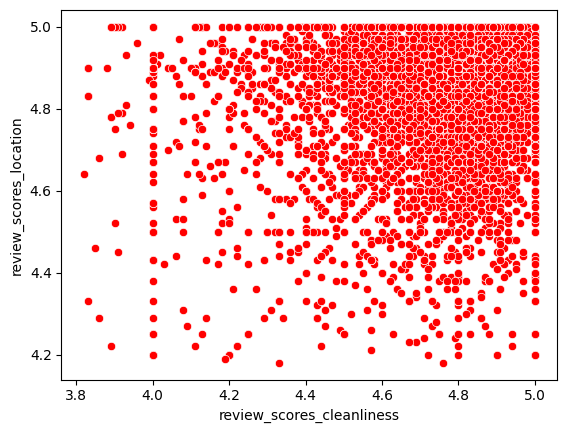

In [328]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="red", data=entire)

In [329]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['review_scores_cleanliness']]
Var_Dep= entire['review_scores_location']

In [330]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [331]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [332]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [333]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1717194]),
 'rank_': 1,
 'singular_': array([24.82910519]),
 'intercept_': 4.060631674524019}

**Modelo matemático: y= 0.1717194x + 4.060631674524019**






In [334]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.0634170864165452

In [335]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.25182749336906246

###**availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

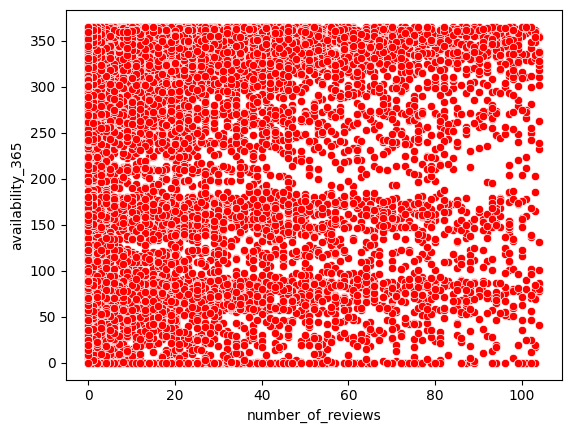

In [336]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='number_of_reviews', y='availability_365', color="red", data=entire)

In [337]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['number_of_reviews']]
Var_Dep= entire['availability_365']

In [338]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [339]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [340]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [341]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.31778531]),
 'rank_': 1,
 'singular_': array([3043.40407768]),
 'intercept_': 248.07608457098667}

**Modelo matemático: y= -0.31778531 + 248.07608457098667**






In [342]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.003950859488887404

In [343]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.0628558628044147

###**reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

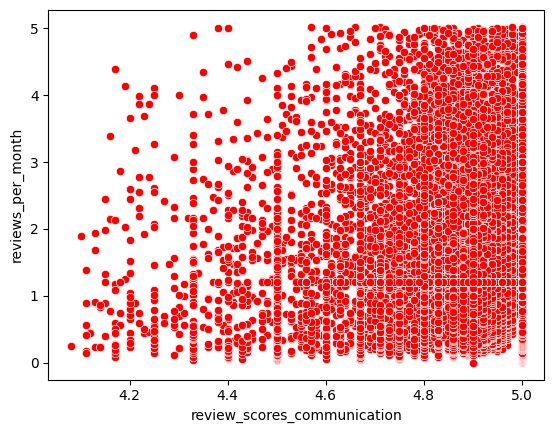

In [344]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="red", data=entire)

In [345]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['review_scores_communication']]
Var_Dep= entire['reviews_per_month']

In [346]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [347]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [348]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [349]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.4357773]),
 'rank_': 1,
 'singular_': array([17.97365279]),
 'intercept_': 3.5712721368772566}

**Modelo matemático: y= -0.4357773x + 3.5712721368772566**






In [350]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.002493758947397784

In [351]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.049937550474545546

###**TABLA**

In [352]:
tabla1 = pd.DataFrame()
tabla1['X']= valorx
tabla1['Y']= valory
tabla1['Coef Deter']= determinacion
tabla1['Coef Correl']= correlacion

In [353]:
tabla1

,X,Y,Coef Deter,Coef Correl
0,host_response_rate,host_acceptance_rate,0.011757,0.108428
1,price,host_acceptance_rate,0.001185,0.034424
2,number_of_reviews,host_acceptance_rate,0.007611,0.087239
3,review_scores_cleanliness,review_scores_location,0.063417,0.251827
4,numbres_of_reviews,availability_365,0.003951,0.062856
5,review_scores_communication,reviews_per_month,0.002494,0.049938


##**PRIVATE**

In [354]:
private = mexico2[mexico2['room_type']=='Private room']

In [355]:
valorx = []
valory=[]
correlacion =[]
determinacion=[]

In [356]:
valorx=['host_response_rate', 'price', 'number_of_reviews', 'review_scores_cleanliness', 'numbres_of_reviews', 'review_scores_communication']
valory=['host_acceptance_rate', 'host_acceptance_rate', 'host_acceptance_rate', 'review_scores_location', 'availability_365', 'reviews_per_month']

###**host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

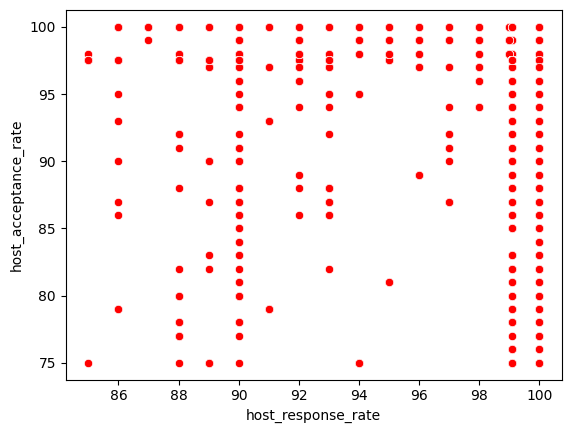

In [357]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="red", data=private)

In [358]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['host_response_rate']]
Var_Dep= private['host_acceptance_rate']

In [359]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [360]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [361]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [362]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.09878758]),
 'rank_': 1,
 'singular_': array([237.71858294]),
 'intercept_': 87.24997847456815}

**Modelo matemático: y= 0.09878758x + 87.24997847456815**

In [363]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.002671674381234612

In [364]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.051688242195247966

###**host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

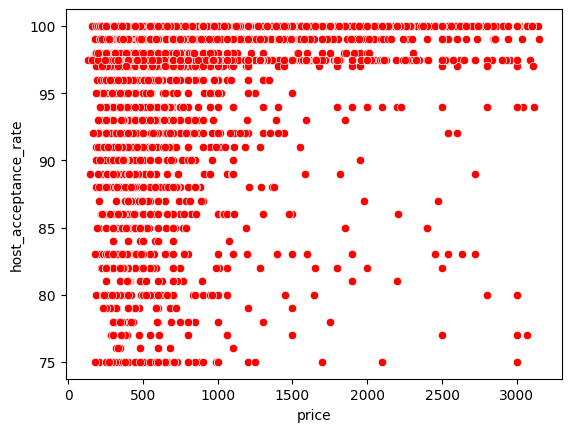

In [365]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=private)

In [366]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['price']]
Var_Dep= private['host_acceptance_rate']

In [367]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [368]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [369]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [370]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00054859]),
 'rank_': 1,
 'singular_': array([43623.45990033]),
 'intercept_': 96.64624252026167}

**Modelo matemático: y= 0.00054859x + 96.64624252026167**






In [371]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.0027745058046083626

In [372]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.0526735778603311

###**host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

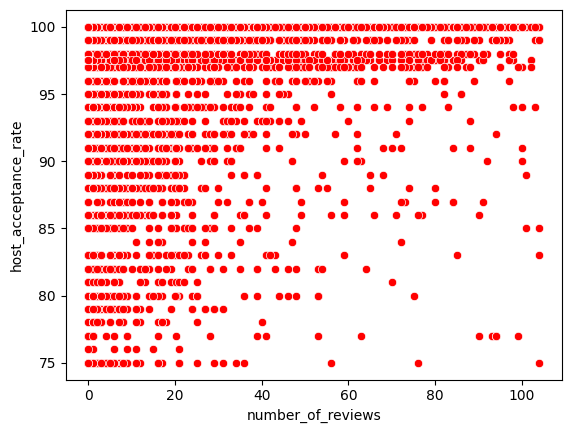

In [373]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=private)

In [374]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['number_of_reviews']]
Var_Dep= private['host_acceptance_rate']

In [375]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [376]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [377]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [378]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00978902]),
 'rank_': 1,
 'singular_': array([1917.04175235]),
 'intercept_': 96.8665444632238}

**Modelo matemático: y= 0.00978902x + 97.96.8665444632238**






In [379]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.0017060577378921193

In [380]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.04130445179265934

###**review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

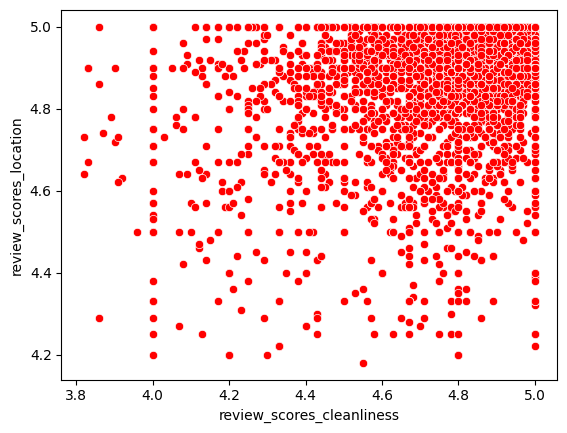

In [381]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="red", data=private)

In [382]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['review_scores_cleanliness']]
Var_Dep= private['review_scores_location']

In [383]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [384]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [385]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [386]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1823005]),
 'rank_': 1,
 'singular_': array([19.84719247]),
 'intercept_': 4.022997878876168}

**Modelo matemático: y=0.1823005x + 4.022997878876168**






In [387]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.09425243469143818

In [388]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.30700559390903315

###**availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

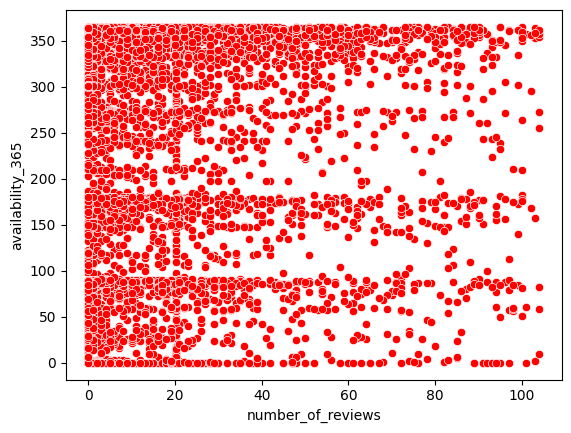

In [389]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='number_of_reviews', y='availability_365', color="red", data=private)

In [390]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['number_of_reviews']]
Var_Dep= private['availability_365']

In [391]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [392]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [393]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [394]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.42649563]),
 'rank_': 1,
 'singular_': array([1917.04175235]),
 'intercept_': 259.4657132816131}

**Modelo matemático: y= -0.42649563x + 259.4657132816131**






In [395]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.0052044827855940445

In [396]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.07214210133891336

###**reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

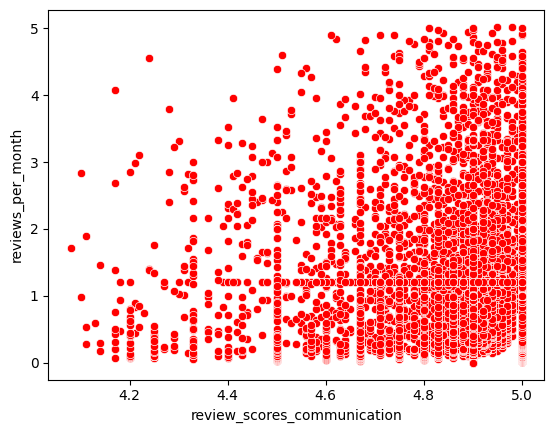

In [397]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="red", data=private)

In [398]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['review_scores_communication']]
Var_Dep= private['reviews_per_month']

In [399]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [400]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [401]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [402]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.04493604]),
 'rank_': 1,
 'singular_': array([13.3146952]),
 'intercept_': 5.913871906612326}

**Modelo matemático: y= -1.04493604x + 5.913871906612326**






In [403]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.02247215718441886

In [404]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.14990716188501088

###**TABLA**

In [405]:
tabla2 = pd.DataFrame()
tabla2['X']= valorx
tabla2['Y']= valory
tabla2['Coef Deter']= determinacion
tabla2['Coef Correl']= correlacion

In [406]:
tabla2

,X,Y,Coef Deter,Coef Correl
0,host_response_rate,host_acceptance_rate,0.002672,0.051688
1,price,host_acceptance_rate,0.002775,0.052674
2,number_of_reviews,host_acceptance_rate,0.001706,0.041304
3,review_scores_cleanliness,review_scores_location,0.094252,0.307006
4,numbres_of_reviews,availability_365,0.005204,0.072142
5,review_scores_communication,reviews_per_month,0.022472,0.149907


#**TABLA MEXICO**

In [407]:
tabMex= pd.concat([tabla1, tabla2])
tabMex['Pais']= ('Mexico','Mexico','Mexico','Mexico','Mexico','Mexico','Mexico','Mexico','Mexico','Mexico','Mexico','Mexico')
tabMex['Tipo Habitacion']= ('Entier home','Entier home','Entier home','Entier home','Entier home','Entier home','Private','Private','Private','Private','Private','Private')
columnas = ['Pais','Tipo Habitacion', 'X', 'Y','Coef Deter','Coef Correl']
tabMex = tabMex.reindex(columns=columnas)
tabMex

,Pais,Tipo Habitacion,X,Y,Coef Deter,Coef Correl
0,Mexico,Entier home,host_response_rate,host_acceptance_rate,0.011757,0.108428
1,Mexico,Entier home,price,host_acceptance_rate,0.001185,0.034424
2,Mexico,Entier home,number_of_reviews,host_acceptance_rate,0.007611,0.087239
3,Mexico,Entier home,review_scores_cleanliness,review_scores_location,0.063417,0.251827
4,Mexico,Entier home,numbres_of_reviews,availability_365,0.003951,0.062856
5,Mexico,Entier home,review_scores_communication,reviews_per_month,0.002494,0.049938
0,Mexico,Private,host_response_rate,host_acceptance_rate,0.002672,0.051688
1,Mexico,Private,price,host_acceptance_rate,0.002775,0.052674
2,Mexico,Private,number_of_reviews,host_acceptance_rate,0.001706,0.041304
3,Mexico,Private,review_scores_cleanliness,review_scores_location,0.094252,0.307006


# **ESPAÑA**

In [408]:
espana.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 19655 entries, 14551.0 to 8.58424e+17
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   19655 non-null  object 
 1   scrape_id                                     19655 non-null  float64
 2   last_scraped                                  19655 non-null  object 
 3   source                                        19655 non-null  object 
 4   name                                          19655 non-null  object 
 5   description                                   19632 non-null  object 
 6   neighborhood_overview                         8342 non-null   object 
 7   picture_url                                   19655 non-null  object 
 8   host_id                                       19655 non-null  int64  
 9   host_url                                      1

In [409]:
#Debido a que la variable de price esta como string, esta se cambia a float y se eliminan los signos de pesos y comas.
espana.price= espana.price.replace({'\$':''}, regex = True)
espana.price= espana.price.replace({'\,':''}, regex = True)
espana.host_response_rate= espana.host_response_rate.replace({'\%':''}, regex = True)
espana.host_acceptance_rate= espana.host_acceptance_rate.replace({'\%':''}, regex = True)
espana['host_response_rate'] = espana['host_response_rate'].astype(float)
espana['host_acceptance_rate'] = espana['host_acceptance_rate'].astype(float)
espana['price'] = espana['price'].astype(float)

##**VALORES NULOS**

In [410]:
#Corroboramos valores nulos
espana.isnull().sum().sum()

174630

In [411]:
#Dividimos el dataframe en cuantitavios y cualitativos
cuanE = espana.select_dtypes(include=[np.float, np.int])
cualiE = espana.select_dtypes(include=[np.object])

<ipython-input-411-7bbb4a2ce4d3>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cuanE = espana.select_dtypes(include=[np.float, np.int])
<ipython-input-411-7bbb4a2ce4d3>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c

In [412]:
#Checamos valores nulos por columna
cualiE.isnull().sum()

listing_url                   0
last_scraped                  0
source                        0
name                          0
description                  23
neighborhood_overview     11313
picture_url                   0
host_url                      0
host_name                   117
host_since                  117
host_location              5559
host_about                 8424
host_response_time         2088
host_is_superhost            15
host_thumbnail_url          117
host_picture_url            117
host_neighbourhood        18386
host_verifications            0
host_has_profile_pic        117
host_identity_verified      117
neighbourhood             11313
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               16
amenities                     0
has_availability              0
calendar_last_scraped         0
first_review               5227
last_review                5227
license                    1135
instant_

In [413]:
#Rellenamos con "--" todos los datos nulos
cualiE= cualiE.fillna("--")

In [414]:
#Verificamos valores nulos
cualiE.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

In [415]:
#Checamos valores nulos por columna
cuanE.isnull().sum()

scrape_id                                           0
host_id                                             0
host_response_rate                               2088
host_acceptance_rate                             1153
host_listings_count                               117
host_total_listings_count                         117
neighbourhood_group_cleansed                    19655
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                       19655
bedrooms                                          503
beds                                               93
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              1
maximum_minimum_nights                              1
minimum_maximum_nights      

In [416]:
#Rellenamos con el promedio solo las columnas que presentan menos de 50 datos nulos
cuanE[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]]=cuanE[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].fillna(round(cuanE[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].mean(),1))

In [417]:
#Los demas datos al ser muchos los rellenamos con 0 para no afectar posteriores procesos, y se pueda entender que son datos que no se llenaron
cuanE= cuanE.fillna(0)

In [418]:
#Verificamos valores nulos
cuanE.isnull().sum()

scrape_id                                       0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0


##**OUTLIERS**

<Figure size 1500x800 with 0 Axes>

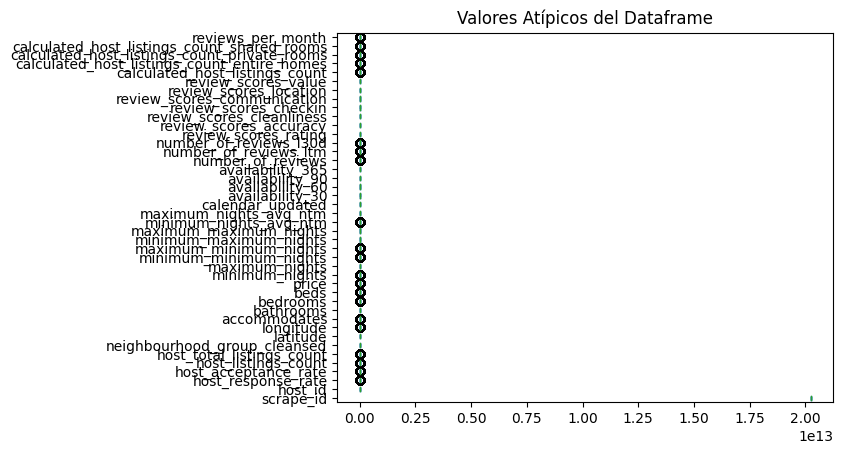

In [419]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuanE.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [420]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
#Este metodo se utiliza ya que lo he encontrado mas efectivo que el metodo de desviacion estandar, siendo que este metodo si elimina todos los outliers
#Por otro lado me parece adecuado ya que al utilizar cuartiles en un dataframe tan grande y simetrico ayuda a que exista un mejor resultado de este metodo
y=cuanE

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023030e+13
host_id                                         5.298792e+08
host_response_rate                              1.120000e+02
host_acceptance_rate                            1.210000e+02
host_listings_count                             1.535000e+02
host_total_listings_count                       2.145000e+02
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        4.288548e+01
longitude                                       3.623007e+00
accommodates                                    9.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        6.000000e+00
beds                                            9.500000e+00
price                                           3.875000e+02
minimum_nights                                  1.100000e+01
maximum_nights                                  2.722500e+0

In [421]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuanE[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1.455100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1.205757e+06,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1.212820e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.516380e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
4.134200e+04,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.583870e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.583960e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.584110e+17,NaN,NaN,43.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [422]:
#Obtenemos datos limpios del Dataframe
cuanE= cuanE[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
cuanE

,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1.455100e+04,2.023030e+13,57237,100.0,90.0,1.0,5.0,0.0,41.996500,2.836460,2.0,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,NaN,0.0,0.37
1.205757e+06,2.023030e+13,6586355,100.0,NaN,1.0,1.0,0.0,41.793040,2.774120,2.0,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,NaN,0.0,0.51
1.212820e+06,2.023030e+13,6620645,100.0,80.0,2.0,3.0,0.0,42.112840,3.166700,4.0,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
7.516380e+05,2.023030e+13,3680160,100.0,91.0,6.0,6.0,0.0,42.369580,2.980300,2.0,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,NaN,0.0,0.08
4.134200e+04,2.023030e+13,180072,NaN,NaN,2.0,3.0,0.0,42.346550,3.204630,4.0,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.583870e+17,2.023030e+13,26281633,93.0,100.0,34.0,44.0,0.0,41.957265,3.201288,8.0,...,0.00,0.00,0.00,0.00,0.00,34.0,34.0,0.0,0.0,0.00
8.583960e+17,2.023030e+13,444428600,100.0,100.0,3.0,3.0,0.0,41.699070,2.844080,4.0,...,0.00,0.00,0.00,0.00,0.00,1.0,1.0,0.0,0.0,0.00
8.584110e+17,2.023030e+13,491503593,NaN,NaN,9.0,11.0,0.0,41.813720,3.064465,4.0,...,0.00,0.00,0.00,0.00,0.00,9.0,9.0,0.0,0.0,0.00


In [423]:
#Corroboramos valores nulos del dataframe LIMPIO
cuanE.isnull().sum()

scrape_id                                          0
host_id                                            0
host_response_rate                              3168
host_acceptance_rate                            2961
host_listings_count                             1832
host_total_listings_count                       2449
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                        926
accommodates                                    1616
bathrooms                                          0
bedrooms                                         294
beds                                             565
price                                           1944
minimum_nights                                   449
maximum_nights                                     0
minimum_minimum_nights                           434
maximum_minimum_nights                          1009
minimum_maximum_nights                        

In [424]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
cuanE=cuanE.fillna(round(cuanE.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuanE.isnull().sum()
valores_nulos

scrape_id                                       0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0


In [425]:
#Realizamos un merge de las dos dataframes limpias
espana2=pd.merge(cualiE,cuanE , left_index=True, right_index=True, how='outer')
espana2.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
14551.0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,24/11/2009,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
41342.0,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,25/07/2010,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
45400.0,https://www.airbnb.com/rooms/45400,01/04/2023,city scrape,Begur - Loft - Costa Brava - SPAIN,<b>The space</b><br />Flat / Apartment. New. P...,--,https://a0.muscache.com/pictures/2206667/ea3bd...,https://www.airbnb.com/users/show/201228,Oscar,14/08/2010,...,4.73,4.93,4.94,4.89,4.70,1.0,1.0,0.0,0.0,0.20
48764.0,https://www.airbnb.com/rooms/48764,31/03/2023,city scrape,18th C Stone House near Costa Brava,Casa Fluvia is a charming stone village house ...,Torroella de FluviÃ¡ is a small peaceful rural...,https://a0.muscache.com/pictures/19824290/9c7a...,https://www.airbnb.com/users/show/220145,Dick And Ann,01/09/2010,...,4.88,4.97,4.97,4.70,4.82,1.0,1.0,0.0,0.0,0.24
93343.0,https://www.airbnb.com/rooms/93343,01/04/2023,city scrape,Alquiler de casa en La Costa Brava cerca de playa,Siguiendo con nuestra linea de alojamientos co...,Localizada a:<br />Playa : 700 m<br />Supermer...,https://a0.muscache.com/pictures/6656368/7038d...,https://www.airbnb.com/users/show/477826,Francisco,01/04/2011,...,0.00,0.00,0.00,0.00,0.00,3.0,3.0,0.0,0.0,0.00


In [426]:
#Verificamos datos nulos
espana2.isnull().sum().sum()

0

##**Entire home/apt**

In [427]:
entire = espana2[espana2['room_type']=='Entire home/apt']

In [428]:
valorx = []
valory=[]
correlacion =[]
determinacion=[]

In [429]:
valorx=['host_response_rate', 'price', 'number_of_reviews', 'review_scores_cleanliness', 'numbres_of_reviews', 'review_scores_communication']
valory=['host_acceptance_rate', 'host_acceptance_rate', 'host_acceptance_rate', 'review_scores_location', 'availability_365', 'reviews_per_month']

###**host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

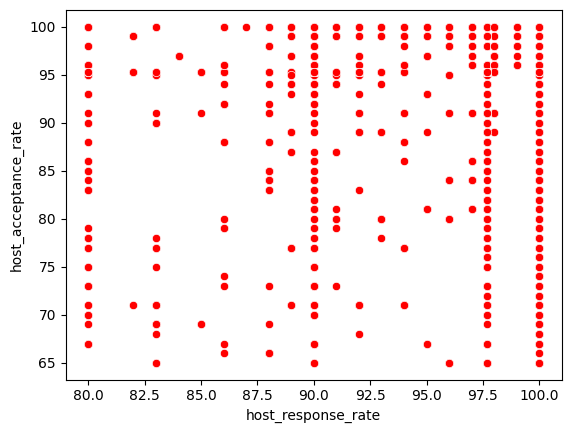

In [430]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="red", data=entire)

In [431]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['host_response_rate']]
Var_Dep= entire['host_acceptance_rate']

In [432]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [433]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [434]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [435]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.06030004]),
 'rank_': 1,
 'singular_': array([570.35178548]),
 'intercept_': 89.5607322695233}

**Modelo matemático: y= 0.06030004x + 89.5607322695233**

In [436]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.0012056237671272951

In [437]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.034722093357505035

###**host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

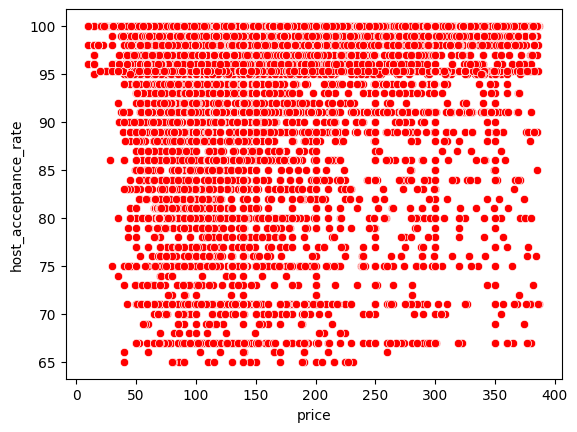

In [438]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=entire)

In [439]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['price']]
Var_Dep= entire['host_acceptance_rate']

In [440]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [441]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [442]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [443]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00171808]),
 'rank_': 1,
 'singular_': array([10511.41615113]),
 'intercept_': 95.69620729025513}

**Modelo matemático: y= -0.00171808x + 95.69620729025513**






In [444]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.00033243032015384255

In [445]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.018232671777713833

###**host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

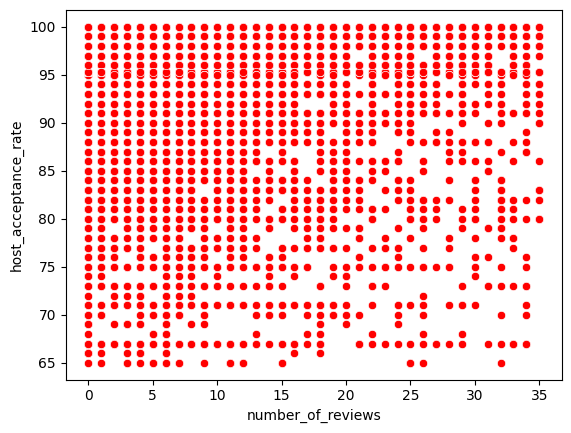

In [446]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=entire)

In [447]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['number_of_reviews']]
Var_Dep= entire['host_acceptance_rate']

In [448]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [449]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [450]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [451]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.06858304]),
 'rank_': 1,
 'singular_': array([1057.1616921]),
 'intercept_': 95.81537510926493}

**Modelo matemático: y= -0.06858304x + 95.81537510926493**






In [452]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.00535805644675913

In [453]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.07319874621029468

###**review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

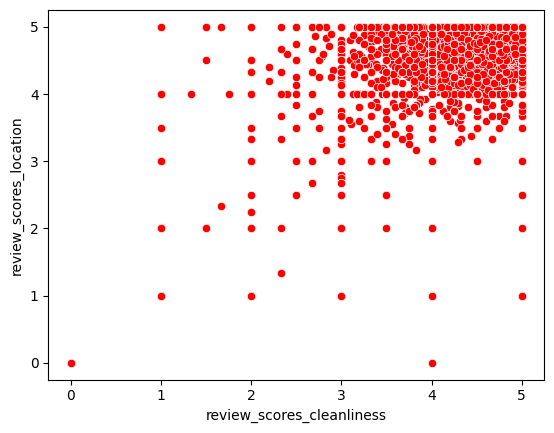

In [454]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="red", data=entire)

In [455]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['review_scores_cleanliness']]
Var_Dep= entire['review_scores_location']

In [456]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [457]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [458]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [459]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.00288694]),
 'rank_': 1,
 'singular_': array([312.95491325]),
 'intercept_': 0.11554715861749632}

**Modelo matemático: y= 1.00288694x + 0.11554715861749632**






In [460]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.9533099154721223

In [461]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.9763759088958116

###**availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

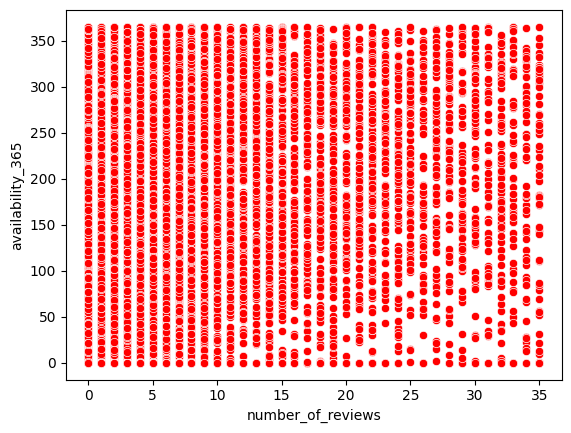

In [462]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='number_of_reviews', y='availability_365', color="red", data=entire)

In [463]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['number_of_reviews']]
Var_Dep= entire['availability_365']

In [464]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [465]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [466]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [467]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.11762453]),
 'rank_': 1,
 'singular_': array([1057.1616921]),
 'intercept_': 195.39808090985053}

**Modelo matemático: y= 0.11762453x + 195.39808090985053**






In [468]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

5.752006362880202e-05

In [469]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.007584198285171744

###**reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

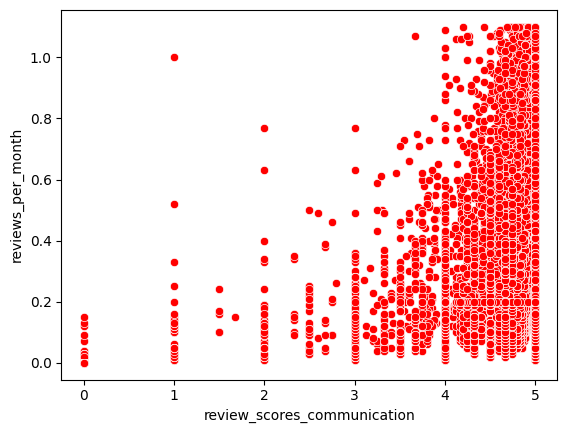

In [470]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="red", data=entire)

In [471]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= entire[['review_scores_communication']]
Var_Dep= entire['reviews_per_month']

In [472]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [473]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [474]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [475]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.06313465]),
 'rank_': 1,
 'singular_': array([322.5151837]),
 'intercept_': 0.00031557301892204404}

**Modelo matemático: y= 0.06313465x + 0.00031557301892204404**






In [476]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.328810844864291

In [477]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.5734203038472662

###**TABLA**

In [478]:
tabla3 = pd.DataFrame()
tabla3['X']= valorx
tabla3['Y']= valory
tabla3['Coef Deter']= determinacion
tabla3['Coef Correl']= correlacion

In [479]:
tabla3

,X,Y,Coef Deter,Coef Correl
0,host_response_rate,host_acceptance_rate,0.001206,0.034722
1,price,host_acceptance_rate,0.000332,0.018233
2,number_of_reviews,host_acceptance_rate,0.005358,0.073199
3,review_scores_cleanliness,review_scores_location,0.953310,0.976376
4,numbres_of_reviews,availability_365,0.000058,0.007584
5,review_scores_communication,reviews_per_month,0.328811,0.573420


##**PRIVATE**

In [480]:
private = espana2[espana2['room_type']=='Private room']

In [481]:
valorx = []
valory=[]
correlacion =[]
determinacion=[]

In [482]:
valorx=['host_response_rate', 'price', 'number_of_reviews', 'review_scores_cleanliness', 'numbres_of_reviews', 'review_scores_communication']
valory=['host_acceptance_rate', 'host_acceptance_rate', 'host_acceptance_rate', 'review_scores_location', 'availability_365', 'reviews_per_month']

###**host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

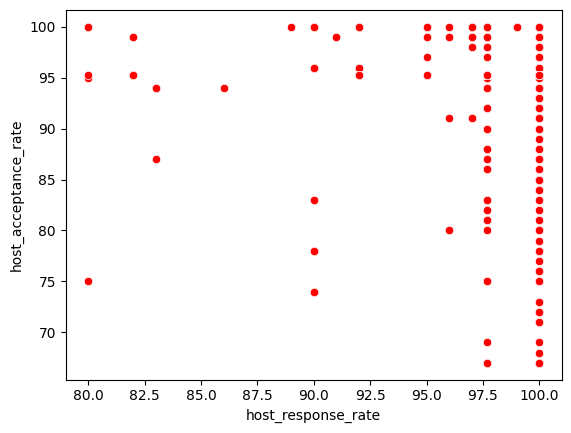

In [483]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="red", data=private)

In [484]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['host_response_rate']]
Var_Dep= private['host_acceptance_rate']

In [485]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [486]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [487]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [488]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00672684]),
 'rank_': 1,
 'singular_': array([112.77678809]),
 'intercept_': 95.76089376838227}

**Modelo matemático: y= 0.09878758x + 87.24997847456815**

In [489]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

7.286898883296367e-06

In [490]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.0026994256580421634

###**host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

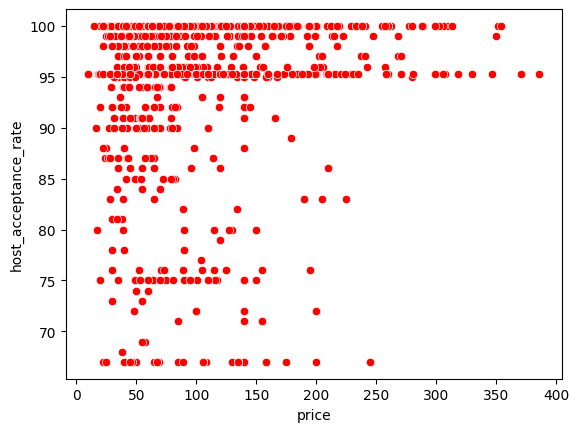

In [491]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=private)

In [492]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['price']]
Var_Dep= private['host_acceptance_rate']

In [493]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [494]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [495]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [496]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00892126]),
 'rank_': 1,
 'singular_': array([2135.92205109]),
 'intercept_': 94.18489849399123}

**Modelo matemático: y= 0.00054859x + 96.64624252026167**






In [497]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.004597316305366417

In [498]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.06780351248546358

###**host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

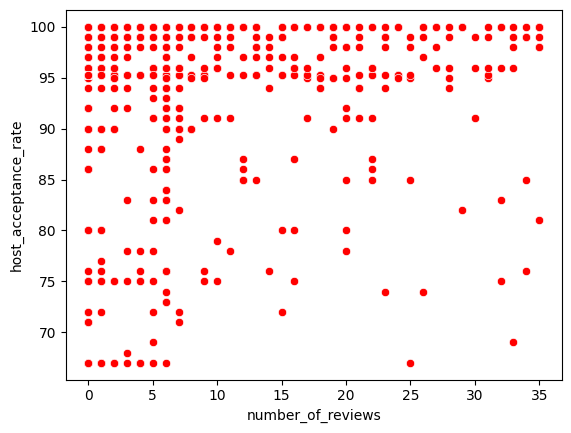

In [499]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=private)

In [500]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['number_of_reviews']]
Var_Dep= private['host_acceptance_rate']

In [501]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [502]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [503]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [504]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.0123389]),
 'rank_': 1,
 'singular_': array([276.88647165]),
 'intercept_': 95.03349886218552}

**Modelo matemático: y= 0.00978902x + 97.96.8665444632238**






In [505]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.00014778727539510594

In [506]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.012156778989317276

###**review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

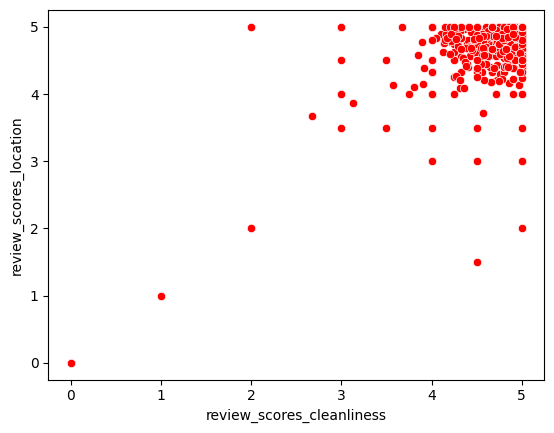

In [507]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="red", data=private)

In [508]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['review_scores_cleanliness']]
Var_Dep= private['review_scores_location']

In [509]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [510]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [511]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [512]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.98903578]),
 'rank_': 1,
 'singular_': array([84.16847472]),
 'intercept_': 0.03898010737793989}

**Modelo matemático: y=0.1823005x + 4.022997878876168**






In [513]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.9788138184555057

In [514]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.9893502001088925

###**availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

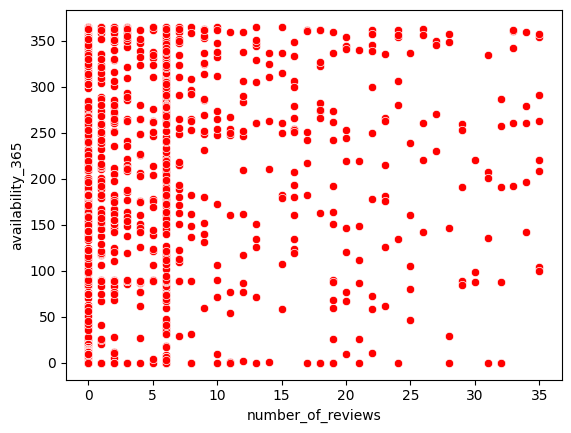

In [515]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='number_of_reviews', y='availability_365', color="red", data=private)

In [516]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['number_of_reviews']]
Var_Dep= private['availability_365']

In [517]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [518]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [519]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [520]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.09618229]),
 'rank_': 1,
 'singular_': array([276.88647165]),
 'intercept_': 210.9668925101796}

**Modelo matemático: y= -0.42649563x + 259.4657132816131**






In [521]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

3.630716812175194e-05

In [522]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.006025542973189382

###**reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

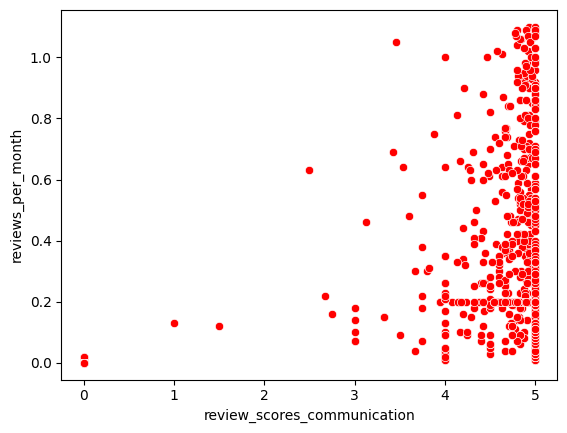

In [523]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="red", data=private)

In [524]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private[['review_scores_communication']]
Var_Dep= private['reviews_per_month']

In [525]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [526]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [527]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [528]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.06799949]),
 'rank_': 1,
 'singular_': array([84.95286907]),
 'intercept_': 0.0031232102022930586}

**Modelo matemático: y= -1.04493604x + 5.913871906612326**






In [529]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.35682839229642294

In [530]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.5973511465598965

###**TABLA**

In [531]:
tabla4 = pd.DataFrame()
tabla4['X']= valorx
tabla4['Y']= valory
tabla4['Coef Deter']= determinacion
tabla4['Coef Correl']= correlacion

In [532]:
tabla4

,X,Y,Coef Deter,Coef Correl
0,host_response_rate,host_acceptance_rate,0.000007,0.002699
1,price,host_acceptance_rate,0.004597,0.067804
2,number_of_reviews,host_acceptance_rate,0.000148,0.012157
3,review_scores_cleanliness,review_scores_location,0.978814,0.989350
4,numbres_of_reviews,availability_365,0.000036,0.006026
5,review_scores_communication,reviews_per_month,0.356828,0.597351


#**TABLA ESPAÑA**

In [533]:
tabEsp= pd.concat([tabla3, tabla4])
tabEsp['Pais']= ('España','España','España','España','España','España','España','España','España','España','España','España')
tabEsp['Tipo Habitacion']= ('Entier home','Entier home','Entier home','Entier home','Entier home','Entier home','Private','Private','Private','Private','Private','Private')
columnas = ['Pais','Tipo Habitacion', 'X', 'Y','Coef Deter','Coef Correl']
tabEsp = tabEsp.reindex(columns=columnas)
tabEsp

,Pais,Tipo Habitacion,X,Y,Coef Deter,Coef Correl
0,España,Entier home,host_response_rate,host_acceptance_rate,0.001206,0.034722
1,España,Entier home,price,host_acceptance_rate,0.000332,0.018233
2,España,Entier home,number_of_reviews,host_acceptance_rate,0.005358,0.073199
3,España,Entier home,review_scores_cleanliness,review_scores_location,0.953310,0.976376
4,España,Entier home,numbres_of_reviews,availability_365,0.000058,0.007584
5,España,Entier home,review_scores_communication,reviews_per_month,0.328811,0.573420
0,España,Private,host_response_rate,host_acceptance_rate,0.000007,0.002699
1,España,Private,price,host_acceptance_rate,0.004597,0.067804
2,España,Private,number_of_reviews,host_acceptance_rate,0.000148,0.012157
3,España,Private,review_scores_cleanliness,review_scores_location,0.978814,0.989350


#**TABLA COMPLETA**

In [541]:
tabla= pd.concat([tabMex, tabEsp])
tabla = tabla.set_index('Pais')
tabla

,Tipo Habitacion,X,Y,Coef Deter,Coef Correl
Pais,,,,,
Mexico,Entier home,host_response_rate,host_acceptance_rate,0.011757,0.108428
Mexico,Entier home,price,host_acceptance_rate,0.001185,0.034424
Mexico,Entier home,number_of_reviews,host_acceptance_rate,0.007611,0.087239
Mexico,Entier home,review_scores_cleanliness,review_scores_location,0.063417,0.251827
Mexico,Entier home,numbres_of_reviews,availability_365,0.003951,0.062856
Mexico,Entier home,review_scores_communication,reviews_per_month,0.002494,0.049938
Mexico,Private,host_response_rate,host_acceptance_rate,0.002672,0.051688
Mexico,Private,price,host_acceptance_rate,0.002775,0.052674
Mexico,Private,number_of_reviews,host_acceptance_rate,0.001706,0.041304


In [542]:
#from google.colab import files
#tabla.to_csv("Tabla.csv")
#files.download("Tabla.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>